# Pairwise Conditional Gradient

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
import math

In [ ]:
# class PARAM:
    
#      def __init__(self):
#         self._Tmax = 0
#         self._TOL = 0
#         self._verbose = True
#         self._pureFW = 1 # to not use away steps...
       
#      # function to get value of _age
#      def get_Tmax(self):
#          return self._Tmax
       
#      # function to set value of _age
#      def set_Tmax(self, a):
#          self._Tmax = a
  
#      # function to delete _age attribute
#      def del_Tmax(self):
#          del self._Tmax

#      def get_TOL(self):
#          return self._TOL
       
#      # function to set value of _age
#      def set_TOL(self, a):
#          self._TOL = a
  
#      # function to delete _age attribute
#      def del_TOL(slf):
#          del self._TOL

#      def get_verbose(self):
#          return self._verbose
       
#      # function to set value of _age
#      def set_verbose(self, a):
#          self._verbose = a
  
#      # function to delete _age attribute
#      def del_verbose(self):
#          del self._verbose

#      def get_pureFW(self):
#          return self._pureFW
       
#      # function to set value of _age
#      def set_pureFW(self, a):
#          self._pureFW = a
  
#      # function to delete _age attribute
#      def del_pureFW(self):
#          del self._pureFW
     
#      Tmax = property(get_Tmax, set_Tmax, del_Tmax) 
#      TOL = property(get_TOL, set_TOL, del_TOL) 
#      verbose = property(get_verbose, set_verbose, del_verbose) 
#      pureFW = property(get_verbose, set_pureFW, del_pureFW) 

  
# opts = PARAM()
  


# Probability Simplex

In [ ]:
def backtracking_ls(objectiveFunction, x, grad, direction, steps, max_size):
    step_size = max_size
    grad_direction = np.dot(grad.T, direction)
    i = 0
    ls_eps = 0.01
    ls_tau = 0.5
    evalu_oldpint = objectiveFunction(x)
    evalu_newpoint = objectiveFunction(x + step_size * direction)
    while (evalu_newpoint - evalu_oldpint) > ls_eps * step_size * grad_direction:
        if i > 10:
            if evalu_oldpint - evalu_newpoint >= 0:
                return step_size, i
            else:
                return 0, i
        step_size *= ls_tau
        evalu_newpoint = objectiveFunction(x + step_size * direction)
        i += 1
    # assert (evalu_oldpint - evalu_newpoint >= 0)
    return step_size, i

In [ ]:
# Step size funtion http://proceedings.mlr.press/v108/pedregosa20a/pedregosa20a.pdf
def take_step_size(f, d_t, x_t, g_t, L, gama_max):
    # power factor
    L = 1
    tau = 1.1

    mu = 0.9
    # Lipschitz estimate
    M = L * (mu + 1)

    n_dt = np.linalg.norm(d_t, 2) ** 2

    # Estimate step size
    gama = min((g_t / (M * n_dt)), gama_max)

    # quadratic approximation
    Q_t = f(x_t) - gama * g_t + 0.5 * M * n_dt * gama**2

    f_new = f(x_t - gama * d_t)

    while f_new > Q_t:

        M = tau * M

        # update step size
        gama = min((g_t / (M * n_dt)), gama_max)

        # update quadratic term
        Q_t = f(x_t) - gama * g_t + 0.5 * M * n_dt * gama**2

        f_new = f(x_t - gama * d_t)

    return gama, M

In [ ]:
n_dim = 500

# x_target = np.random.dirichlet(np.ones(n_dim),size=1).T

x_target = np.ones((n_dim, 1)) / n_dim

# x_start = np.random.dirichlet(np.ones(n_dim),size=1).T

x_0 = np.zeros(shape=(n_dim, 1))

x_0[0, 0] = 1

x_start = x_0


def f(x):
    return np.sum((x - x_target)*(x - x_target)) / 2

def grad_f(x):
    return x - x_target

# Local FW on probability simplex
def LMO_local(grad, I_active):
    ips = grad[I_active]
    id_m = np.argmin(ips)
    id_m = I_active[id_m]
    s = np.zeros_like(grad)
    s[id_m] = 1
    return id_m, s

# Global FW on probability simplex
def LMO(grad):
    s = np.zeros_like(grad)
    id_m = np.argmin(grad)
    s[id_m] = 1.0 
    return id_m, s

def compute_extreme_point(grad):
    s = np.zeros_like(grad)
    id_m = np.argmin(grad)
    s[id_m] = 1.0 
    return id_m, s

# Away on probability simplex
def away_step(grad, I_active):
    ips = grad[I_active]
    id_a = I_active[np.argmax(ips)]
    v = np.zeros_like(grad)
    v[id_a] = 1 
    return id_a, v

# Get index from alpha array
def find(s):
    index = []
    ls = s.tolist()
    for l in ls:
        index.append(l[0])
    return index

################# Add new ####################
x_target = np.ones((n_dim, 1)) / n_dim
x_target[0, 0] = 0
x_target[1, 0] = 1 / n_dim
x_0 = np.zeros((n_dim, 1))
# x_0[0, 0] =1

grad = grad_f(x_0)
_, x_start = LMO(grad)
##############################################


In [ ]:
num_of_pairs = 100
L_estimate = -100

norm_estimation = 1

for i in range(num_of_pairs):
    u1 = np.random.rand(x_0.shape[0])
    u1 = u1 / np.sum(u1)
    u1 =  u1 * norm_estimation
    v1 = np.random.rand(x_0.shape[1])
    v1 = v1 / np.sum(v1)
    x = u1[:, np.newaxis] * v1
    u2 = np.random.rand(x_0.shape[0])
    u2 = u2 / np.sum(u2)
    u2 = u2 * norm_estimation
    v2 = np.random.rand(x_0.shape[1])
    v2 = v2 / np.sum(v2)
    y = u2[:, np.newaxis] * v2
    gradient = grad_f(x)
    gradient_aux = grad_f(y)
    new_L = np.linalg.norm(gradient - gradient_aux) / np.linalg.norm(x - y)
    if new_L > L_estimate:
        L_estimate = new_L

In [ ]:
L_estimate

1.0000000000000002

In [ ]:
def update_x(alpha_t, I_active):
    ret = np.zeros(shape=(n_dim, 1))
    print("sum alpha_t {}".format(np.sum(alpha_t)))
    for i in I_active:
        ret[i] = ret[i] + alpha_t[i, 0]
    return ret

In [ ]:
def BPCG(f, grad_f, x_0):

    x_t = x_start
    # grad_start = grad_f(x_start)
    # x_t = compute_extreme_point(grad_start)

    alpha_t = np.zeros((n_dim, 1))

    # Mantain convex combination
    alpha_t[0, 0] = 1.0
    
    # Initial active atoms set
    I_active =  [0]

    fvalues = {}
    gap_values = {}
    res = {}

    number_drop = 0 # counting drop steps (max stepsize for away step)

    # Counter: 
    it = 0
    
    # initial Lipschitz estimate
    L = L_estimate

    eps = 2.220446e-16
   
    while it <= 1000*2:

        it = it + 1
          
        primal = f(x_t)

        fvalues[it-1] = primal

        grad = grad_f(x_t)

        # local Frank wolfe
        id_FW, s_FW  =  LMO_local(grad, I_active) 

        # away vertex
        id_A, a_W   = away_step(grad, I_active)

        # global Frank Wolfe
        id_W, w_FW  = LMO(grad) 

        # Duality gap

        dual_gap = np.dot(grad.T, x_t - w_FW)[0, 0]

        gap_values[it-1] = dual_gap

        # compare local pairwise gap and Frank-Wolfe gap

        if np.dot(grad.T, a_W - s_FW) >= np.dot(grad.T, x_t - w_FW):

            d_t = a_W - s_FW

            d = alpha_t[id_A]

            # step, _ = backtracking_ls(f, x_t, grad, d_t, 100, d)

            gap = np.dot(d_t.T,  grad)

            # take step size
            step, _ = take_step_size(f=f, d_t=d_t, x_t=x_t, g_t=gap, L=L_estimate, gama_max=d)
           
           # Drop step
            if step >= d:

                print("drop step")

                alpha_t[id_FW] = alpha_t[id_FW] + d

                alpha_t[id_A] = 0.0

                I_active.remove(id_A) # remove from active set

                number_drop = number_drop + 1

            # alpha_t = (1-step) * alpha_t     

            alpha_t[id_FW] = alpha_t[id_FW] + step

            alpha_t[id_A] = alpha_t[id_A] - step

        else:
            
            d_t = x_t - w_FW

            # step, _ = backtracking_ls(f, x_t, grad, d_t, 100, 1)
            gap = np.dot(grad.T, d_t)

            step, _ = take_step_size(f=f, d_t=d_t, x_t=x_t, g_t=gap, L=L_estimate, gama_max=1)

            alpha_t = (1-step) * alpha_t  

            alpha_t[id_W] = alpha_t[id_W] + step

            if step > 1-eps:
                alpha_t = alpha_t * 0
                alpha_t[id_FW] = 1
                I_active = [id_W]

        # x_t = x_t - step * d_t

        # Update active atoms
        I_active =  find(np.argwhere(alpha_t > 0))
        print("size I_active {}".format(len(I_active)))
        x_t = update_x(alpha_t, I_active)


    res["primal"] = fvalues
    res["gap"] = gap_values
    res["number_drop"] = number_drop
    res["alpha_t"] = alpha_t
    res["x_t"] = x_t

    return x_t, primal,res

In [ ]:
def BPCG_Lazy(f, grad_f, x_0):

    # start vertex
    x_t = x_start
    # grad_start = grad_f(x_t)

    eps = 2.2e-6

    alpha_t = np.zeros((n_dim, 1))

    # Mantain convex combination
    alpha_t[0, 0] = 1.0
    
    I_active =  [0]

    fvalues = {}
    gap_values = {}
    res = {}

    number_drop = 0 # counting drop steps (max stepsize for away step)

    # Counter: 
    it = 0

    fi_0 = 0.0

    grad = grad_f(x_t)

    # Steps for caculate Φ


    # y = x_t - np.eye(n_dim)

    # id_a = np.argmin(np.dot(grad.T, y))

    # v_0 = np.zeros_like(grad)

    # v_0[id_a] = 1

    v_0 = compute_extreme_point(grad)

    fi = np.dot(grad.T, x_t - v_0)[0,0] / 2

    # Assign Φt
    fi_t = fi

    # accuracy
    J = 1
    # initial Lipschitz estimate
    L = L_estimate
   
    while it <= 1999:

        it = it + 1
          
        primal = f(x_t)

        fvalues[it-1] = primal

        grad = grad_f(x_t)

        print(I_active)

        # Local FW
        id_FW, s_FW  =  LMO_local(grad, I_active) 
        # Away vertex
        id_A, a_W   = away_step(grad, I_active)

        # Need at least 2 atoms for local FW and way vertex  
        if np.dot(grad.T, a_W - s_FW) >= fi_t and it > 1:

            d_t = a_W - s_FW

            d = alpha_t[id_A]

            gap = np.dot(grad.T, d_t)

            # Duality gap is not changed
            gap_values[it-1] = gap_values[it-2]

            # step, _ = backtracking_ls(f, x_t, grad, d_t, 100, d)
            # Take step size
            step, _ = take_step_size(f=f, d_t=d_t, x_t=x_t, g_t=gap, L=L_estimate, gama_max=d)

            # x_t = x_t - step * d_t

            if step >= d:

                # Mantain convex combination
                alpha_t[id_FW] = alpha_t[id_FW] + d
                alpha_t[id_A] = 0.0
                I_active.remove(id_A) # remove from active set
                number_drop = number_drop + 1


            alpha_t[id_FW] = alpha_t[id_FW] + step

            alpha_t[id_A] = alpha_t[id_A] - step

            I_active =  find(np.argwhere(alpha_t > 0))

            x_t = update_x(alpha_t, I_active)

        else:
            # Global FW
            id_W, w_FW  = LMO(grad) 
            
            # Update duality gap
            dual_gap = np.dot(grad.T, x_t - w_FW)
            gap_values[it-1] = dual_gap[0,0]

            if np.dot(grad.T, x_t - w_FW) >= fi_t / J:

                d_t = x_t - w_FW

                gap = np.dot(grad.T, d_t)

                # step, _ = backtracking_ls(f, x_t, grad, d_t, 100, 1)
                step, _ = take_step_size(f=f, d_t=d_t, x_t=x_t, g_t=gap, L=L_estimate, gama_max=1)

                # x_t = x_t - step * d_t

                # Mantain convex combination
                alpha_t = (1-step) * alpha_t  

                alpha_t[id_W] = alpha_t[id_W] + step

                I_active =  find(np.argwhere(alpha_t > 0))

                x_t = update_x(alpha_t, I_active)

            else:

                fi_t = fi_t / 2

        # Update active atoms
        # I_active =  find(np.argwhere(alpha_t > 0))

    res["primal"] = fvalues
    res["gap"] = gap_values
    res["number_drop"] = number_drop
    res["alpha_t"] = alpha_t
    res["x_t"] = x_t

    return x_t,primal,res

In [ ]:
def FW(f, grad_f, x_0):

    eps = 2.220446e-16

    x_t = x_start

    alpha_t = np.zeros((n_dim, 1))

    alpha_t[0, 0] = 1.0
    
    I_active =  [0]

    fvalues = {}
    gap_values = {}
    res = {}

    number_drop = 0 # counting drop steps (max stepsize for away step)

    # optimization: 
    it = 0

    fi_0 = 0.0

    while it < 1000*2:

        it = it + 1

        # cost function:
        f_t = f(x_t)
        # gradient = x-b:
        grad = grad_f(x_t)

        # towards direction search:
        id_FW, s_FW  = LMO(grad) # the linear minimization oracle, returning an atom

        d_FW   = x_t - s_FW  

        # duality gap:
        gap = np.dot(grad.T, d_FW)

        fvalues[it-1] = f_t
        gap_values[it-1] = gap[0, 0]

        d = d_FW
        step = 2 / (2 + it)

        # step, _ = take_step_size(f=f, d_t=d, x_t=x_t, g_t=gap, L=L_estimate, gama_max=1)
        
        # # FW step:
        # alpha_t = (1-step)* alpha_t
            
        # alpha_t[id_FW] = alpha_t[id_FW] + step
                
        # I_active =  find(np.argwhere(alpha_t > 0))

        x_t = x_t - step * d
        
    res["primal"] = fvalues
    res["gap"] = gap_values
    res["number_drop"] = number_drop
    # res["S_t"] = A[:,I_active]
    res["alpha_t"] = alpha_t
    res["x_t"] = x_t

    return x_t,f_t,res

In [ ]:
[x_t, f_t, resBPCG] = BPCG(f, grad_f, x_0)

sum alpha_t 0.9999999999999996
size I_active 500
sum alpha_t 0.9999999999999996
size I_active 500
sum alpha_t 0.9999999999999996
size I_active 500
sum alpha_t 0.9999999999999996
size I_active 500
sum alpha_t 0.9999999999999996
size I_active 500
sum alpha_t 0.9999999999999996
size I_active 500
sum alpha_t 0.9999999999999996
size I_active 500
sum alpha_t 0.9999999999999996
size I_active 500
sum alpha_t 0.9999999999999996
size I_active 500
sum alpha_t 0.9999999999999996
size I_active 500
sum alpha_t 0.9999999999999997
size I_active 500
sum alpha_t 0.9999999999999996
size I_active 500
sum alpha_t 0.9999999999999996
size I_active 500
sum alpha_t 0.9999999999999996
size I_active 500
sum alpha_t 0.9999999999999996
size I_active 500
sum alpha_t 0.9999999999999996
size I_active 500
sum alpha_t 0.9999999999999996
size I_active 500
sum alpha_t 0.9999999999999996
size I_active 500
sum alpha_t 0.9999999999999996
size I_active 500
sum alpha_t 0.9999999999999996
size I_active 500
sum alpha_t 0.999999

In [ ]:
[x_t, f_t, resFW] = FW(f, grad_f, x_0)

In [ ]:
[x_t, f_t, resLBPCG] = BPCG_Lazy(f, grad_f, x_0)

 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346,

In [ ]:
primal_FW = [v for k,v in resFW["primal"].items()]
gaps_FW = [v for k,v in resFW["gap"].items()]

In [ ]:
primal_BPCG = [v for k,v in resBPCG["primal"].items()]
gaps_BPCG = [v for k,v in resBPCG["gap"].items()]

In [ ]:
primal_LBPCG = [v for k,v in resLBPCG["primal"].items()]
gaps_LBPCG = [v for k,v in resLBPCG["gap"].items()]

Text(0.5, 1.0, 'Primal value')

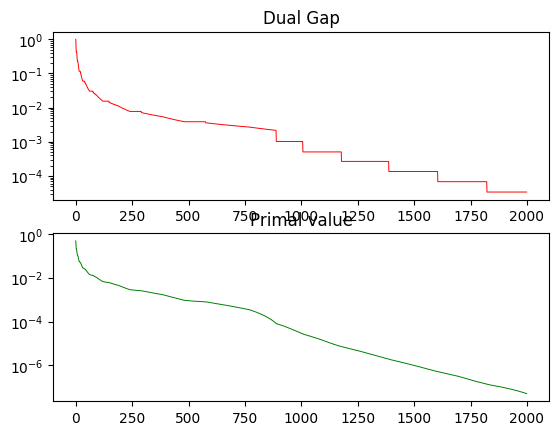

In [ ]:
figure, axis = plt.subplots(2, 1) 

axis[0].set_yscale('log')
axis[1].set_yscale('log')

axis[0].semilogy([i for i in range(len(gaps_LBPCG))], gaps_LBPCG, color='r', linewidth=0.7, label ='AFW' )  
axis[0].set_title("Dual Gap")
  
axis[1].semilogy([i for i in range(len(primal_LBPCG))], primal_LBPCG, color='g', linewidth=0.7, label ='AFW' ) 
axis[1].set_title("Primal value")
 

Text(0.5, 1.0, 'Primal value')

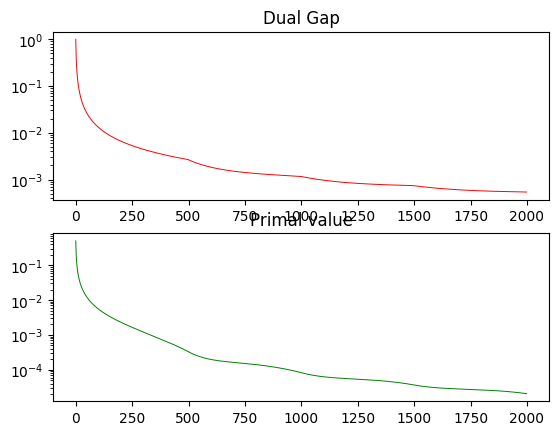

In [ ]:
figure, axis = plt.subplots(2, 1) 

axis[0].set_yscale('log')
axis[1].set_yscale('log')

axis[0].semilogy([i for i in range(len(gaps_FW))], gaps_FW, color='r', linewidth=0.7, label ='AFW' )  
axis[0].set_title("Dual Gap")
  
axis[1].semilogy([i for i in range(len(primal_FW))], primal_FW, color='g', linewidth=0.7, label ='AFW' ) 
axis[1].set_title("Primal value")

Text(0.5, 1.0, 'Primal value')

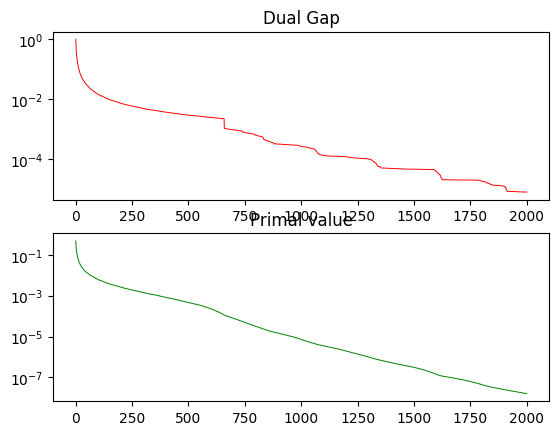

In [ ]:
figure, axis = plt.subplots(2, 1) 

axis[0].set_yscale('log')
axis[1].set_yscale('log')

axis[0].semilogy([i for i in range(len(gaps_BPCG))], gaps_BPCG, color='r', linewidth=0.7, label ='AFW' )  
axis[0].set_title("Dual Gap")
  
axis[1].semilogy([i for i in range(len(primal_BPCG))], primal_BPCG, color='g', linewidth=0.7, label ='AFW' ) 
axis[1].set_title("Primal value")

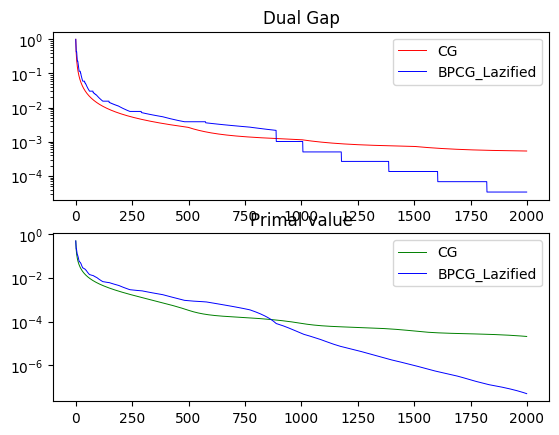

In [ ]:
figure, axis = plt.subplots(2, 1) 

axis[0].set_yscale('log')
axis[1].set_yscale('log')

axis[0].semilogy([i for i in range(len(gaps_FW))], gaps_FW, color='r', linewidth=0.7, label ='CG' )  
axis[0].semilogy([i for i in range(len(gaps_LBPCG))], gaps_LBPCG, color='b', linewidth=0.7, label ='BPCG_Lazified' )  
axis[0].set_title("Dual Gap")
axis[0].legend(loc='best')
  
axis[1].semilogy([i for i in range(len(primal_FW))], primal_FW, color='g', linewidth=0.7, label ='CG' ) 
axis[1].semilogy([i for i in range(len(primal_LBPCG))], primal_LBPCG, color='b', linewidth=0.7, label ='BPCG_Lazified' ) 
axis[1].set_title("Primal value")
axis[1].legend(loc='best')
 

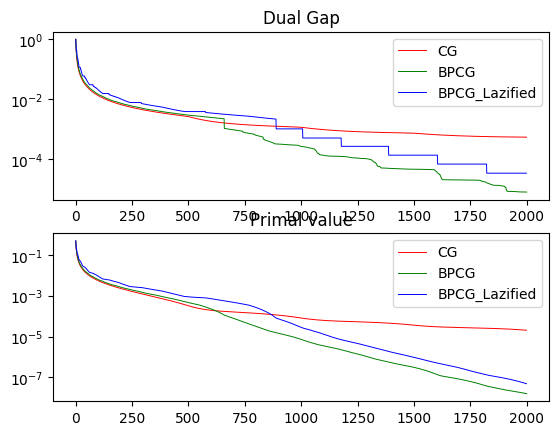

In [ ]:
figure, axis = plt.subplots(2, 1) 

axis[0].set_yscale('log')
axis[1].set_yscale('log')

# axis[0].set_xscale('log')
# axis[1].set_xscale('log')

axis[0].semilogy([i for i in range(len(gaps_FW))], gaps_FW, color='r', linewidth=0.7, label ='CG' )  
axis[0].semilogy([i for i in range(len(gaps_BPCG))], gaps_BPCG, color='g', linewidth=0.7, label ='BPCG' )  
axis[0].semilogy([i for i in range(len(gaps_LBPCG))], gaps_LBPCG, color='b', linewidth=0.7, label ='BPCG_Lazified' )  
axis[0].set_title("Dual Gap")
axis[0].legend(loc='best')

axis[1].semilogy([i for i in range(len(primal_FW))], primal_FW, color='r', linewidth=0.7, label ='CG' ) 
axis[1].semilogy([i for i in range(len(primal_BPCG))], primal_BPCG, color='g', linewidth=0.7, label ='BPCG' ) 
axis[1].semilogy([i for i in range(len(primal_LBPCG))], primal_LBPCG, color='b', linewidth=0.7, label ='BPCG_Lazified' ) 

axis[1].set_title("Primal value")
axis[1].legend(loc='best')

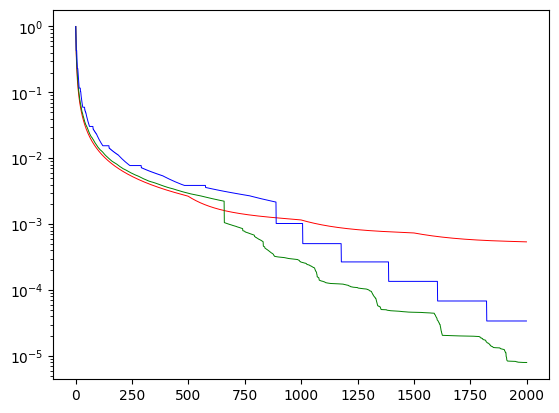

In [ ]:
# figure, axis = plt.subplots(2, 1) 
import matplotlib.pyplot as plt


plt.semilogy([i for i in range(len(gaps_FW))], gaps_FW, color='r', linewidth=0.7, label ='CG' )  
plt.semilogy([i for i in range(len(gaps_BPCG))], gaps_BPCG, color='g', linewidth=0.7, label ='BPCG' )  
plt.semilogy([i for i in range(len(gaps_LBPCG))], gaps_LBPCG, color='b', linewidth=0.7, label ='BPCG_Lazified' )  


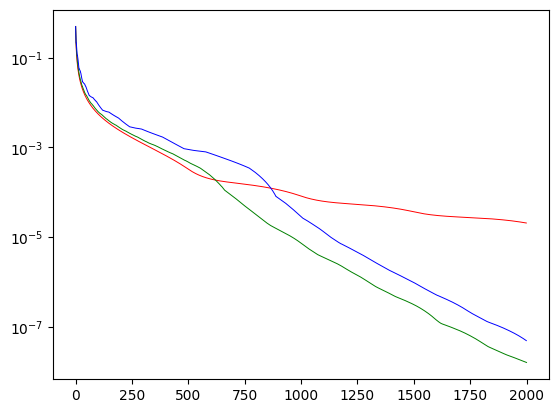

In [ ]:
# figure, axis = plt.subplots(2, 1) 
import matplotlib.pyplot as plt


plt.semilogy([i for i in range(len(primal_FW))], primal_FW, color='r', linewidth=0.7, label ='CG' ) 
plt.semilogy([i for i in range(len(primal_BPCG))], primal_BPCG, color='g', linewidth=0.7, label ='BPCG' ) 
plt.semilogy([i for i in range(len(primal_LBPCG))], primal_LBPCG, color='b', linewidth=0.7, label ='BPCG_Lazified' ) 
  


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bfc9b148-dbe7-4377-abe2-f5805e3fafef' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>